In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

np.random.seed(42)

In [2]:
# Dopasowanie funkcji log periodycznej
def fit_log_periodic(t, y, dates, approx_minima, title, start_date, window=100):
    """
        t: czas
        y: wartość indeksu
        dates: lista dat odpowiadających t
        approx_minima: trzy minima wyznaczone "ręcznie"
        window: okno przeszukiwania minima
    """

    def find_closest_minima(t, y, approx_minima, window=100):
        minima_indices = []
        for approx in approx_minima:
            min_range = (t > approx - window) & (t < approx + window)
            t_range = t[min_range]
            y_range = y[min_range]

            local_minima = argrelextrema(y_range, np.less)[0]

            if local_minima.size > 0:
                closest_min = local_minima[np.argmin(np.abs(t_range[local_minima] - approx))]
                minima_indices.append(np.where(t == t_range[closest_min])[0][0])
        return minima_indices

    # Znalezienie minimów
    minima_indices = find_closest_minima(t, y, approx_minima, window)
    t_min = t[minima_indices]
    y_min = y[minima_indices]

    # Lambda
    lambda_val = (t_min[1] - t_min[0]) / (t_min[2] - t_min[1])
    print(f"Lambda = {lambda_val:.3f}")

    # Estymacja T_c
    start = t_min[-1]
    dist = t_min[-1] - t_min[-2]
    while dist > 1:
        dist /= 2
        start += dist

    start_date = pd.to_datetime(start_date)
    tc_date = (start_date + pd.to_timedelta(start, unit='D')).date()
    print(f"Krach w dniu: {tc_date}")

    # Prognozowane minima
    forecast = t_min[2] + (t_min[2] - t_min[1]) / 1.591
    next_forecast = forecast + (forecast - t_min[2]) / 1.591

    # Rysowanie wykresu
    plt.figure(figsize=(10, 5))
    plt.plot(t, y, label="Dane rzeczywiste", alpha=0.6)
    plt.scatter(t_min, y_min, color="red")
    plt.axvline(t_min[0], color="r", linestyle="-.", label="Zidentyfikowane inima")
    plt.axvline(t_min[1], color="r", linestyle="-.")
    plt.axvline(t_min[2], color="r", linestyle="-.")
    plt.axvline(forecast, color="r", linestyle=":", label="Prognozowane następne minimum")
    plt.axvline(start, color="r", linestyle="-", label="T_c (punkt krytyczny)")
    plt.xlabel(f"Dni od {pd.to_datetime(start_date).date()}")
    plt.ylabel("Wartość ($)")
    plt.title(title)
    plt.xlim([min(t), max(max(t), start) + 5])
    plt.legend()
    plt.tight_layout()
    plt.show()

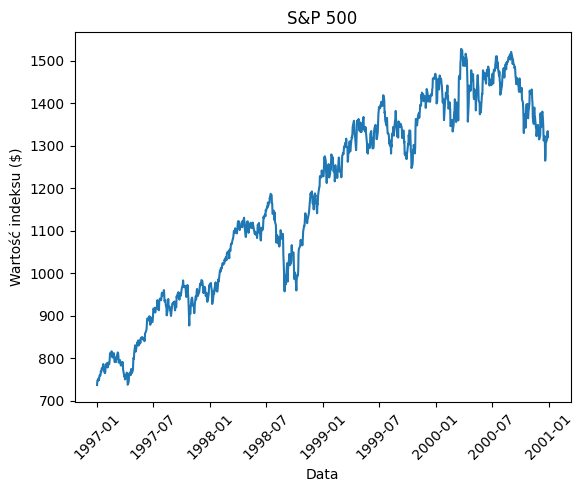

In [3]:
sp = yf.Ticker("^GSPC")

sp_hist = sp.history(start="1997-01-01", end="2000-12-31", interval="1d")

plt.plot(sp_hist['Close'])
plt.title("S&P 500")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.ylabel("Wartość indeksu ($)")
plt.show()

dates = pd.to_datetime(sp_hist.index)
t_numeric = (dates - dates[0]).days
prices = sp_hist['Close'].values

sp_hist = sp_hist.reset_index()
sp_hist["time"] = (sp_hist["Date"] - sp_hist["Date"].min()).dt.days

t = sp_hist["time"].values
y = sp_hist["Close"].values

Lambda = 2.044
Krach w dniu: 2000-10-10


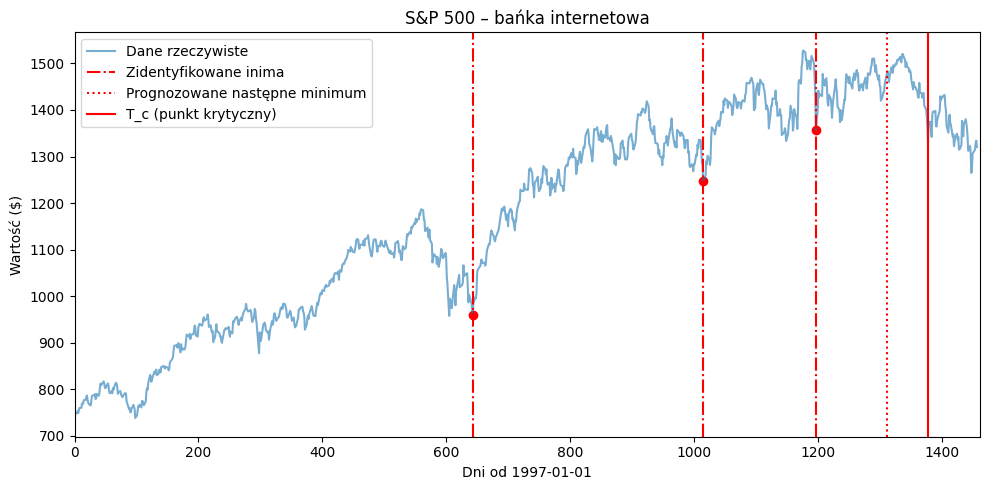

In [ ]:
fit_log_periodic(t, y, dates, [640, 1015, 1195], "S&P 500 – bańka internetowa", "1997-01-01")

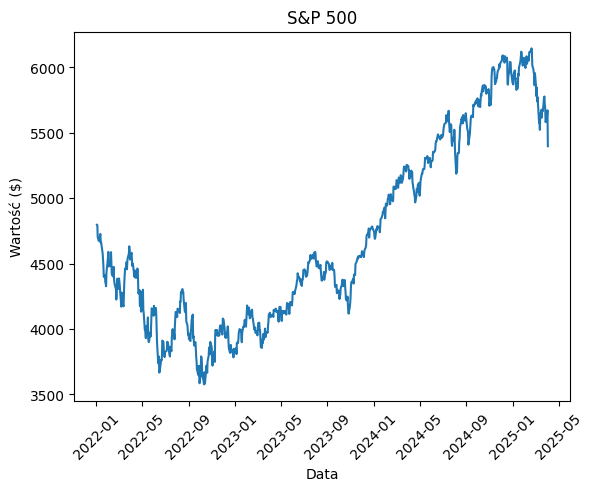

In [ ]:
sp = yf.Ticker("^GSPC")

sp_hist = sp.history(start="2022-01-01", end="2025-04-04", interval="1d")

plt.plot(sp_hist['Close'])
plt.title("S&P 500")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.ylabel("Wartość ($)")
plt.show()

dates = pd.to_datetime(sp_hist.index)
t_numeric = (dates - dates[0]).days
prices = sp_hist['Close'].values

sp_hist = sp_hist.reset_index()
sp_hist["time"] = (sp_hist["Date"] - sp_hist["Date"].min()).dt.days

t = sp_hist["time"].values
y = sp_hist["Close"].values

Lambda = 1.591
Krach w dniu: 2024-11-21


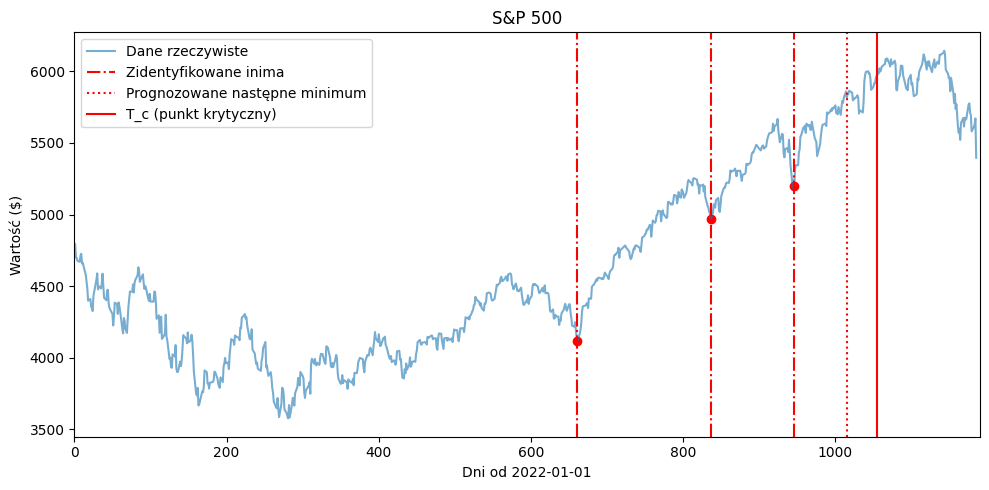

In [ ]:
fit_log_periodic(t, y, dates, [660, 835, 950], "S&P 500", "2022-01-01")

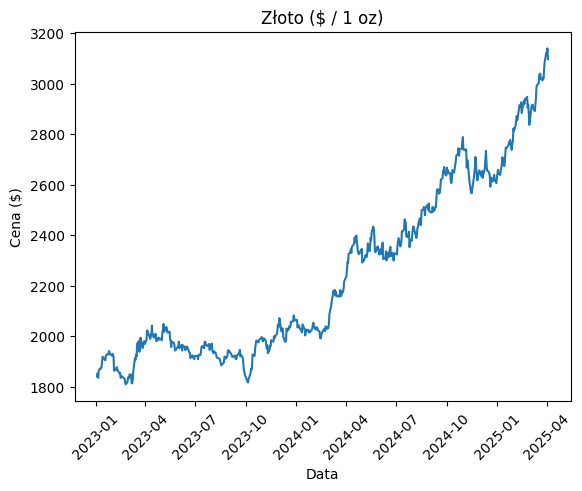

In [ ]:
sp = yf.Ticker("GC=F")

sp_hist = sp.history(start="2023-01-01", end="2025-04-04", interval="1d")

plt.plot(sp_hist['Close'])
plt.title("Złoto ($ / 1 oz)")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.ylabel("Cena ($)")
plt.show()

dates = pd.to_datetime(sp_hist.index)
t_numeric = (dates - dates[0]).days
prices = sp_hist['Close'].values

sp_hist = sp_hist.reset_index()
sp_hist["time"] = (sp_hist["Date"] - sp_hist["Date"].min()).dt.days

t = sp_hist["time"].values
y = sp_hist["Close"].values

Lambda = 1.853
Krach w dniu: 2025-04-04


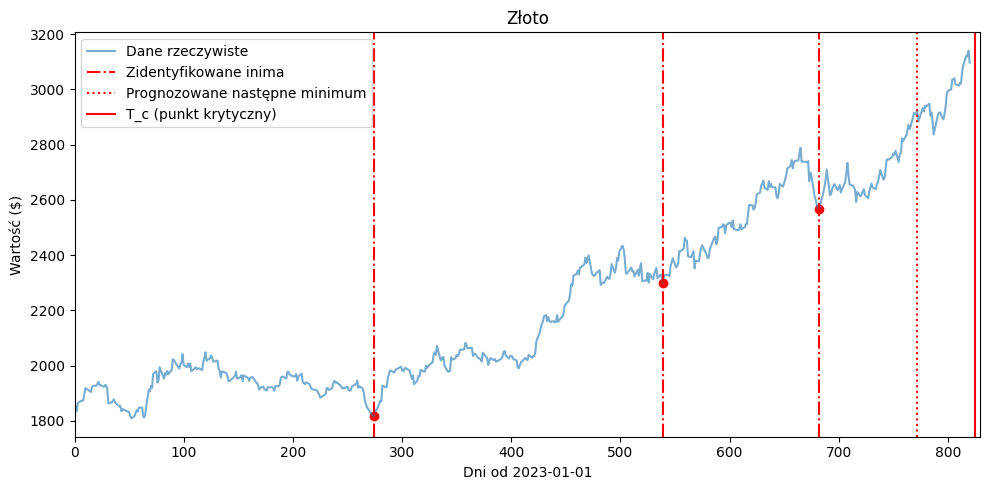

In [ ]:
fit_log_periodic(t, y, dates, [270, 540, 680], "Złoto", "2023-01-01")

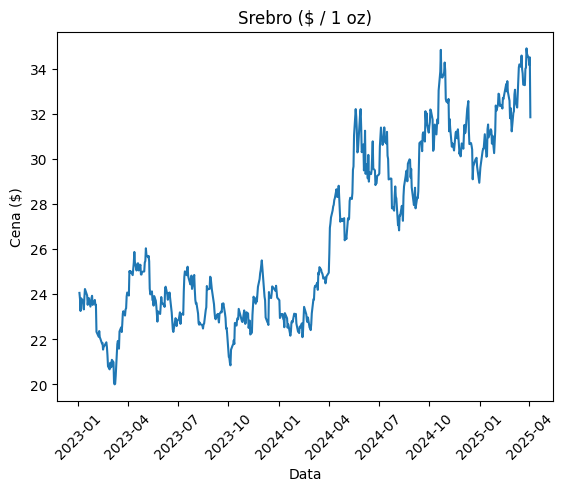

In [ ]:
sp = yf.Ticker("SI=F")

sp_hist = sp.history(start="2023-01-01", end="2025-04-04", interval="1d")

plt.plot(sp_hist['Close'])
plt.title("Srebro ($ / 1 oz)")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.ylabel("Cena ($)")
plt.show()

dates = pd.to_datetime(sp_hist.index)
t_numeric = (dates - dates[0]).days
prices = sp_hist['Close'].values

sp_hist = sp_hist.reset_index()
sp_hist["time"] = (sp_hist["Date"] - sp_hist["Date"].min()).dt.days

t = sp_hist["time"].values
y = sp_hist["Close"].values

Lambda = 2.047
Krach w dniu: 2025-05-26


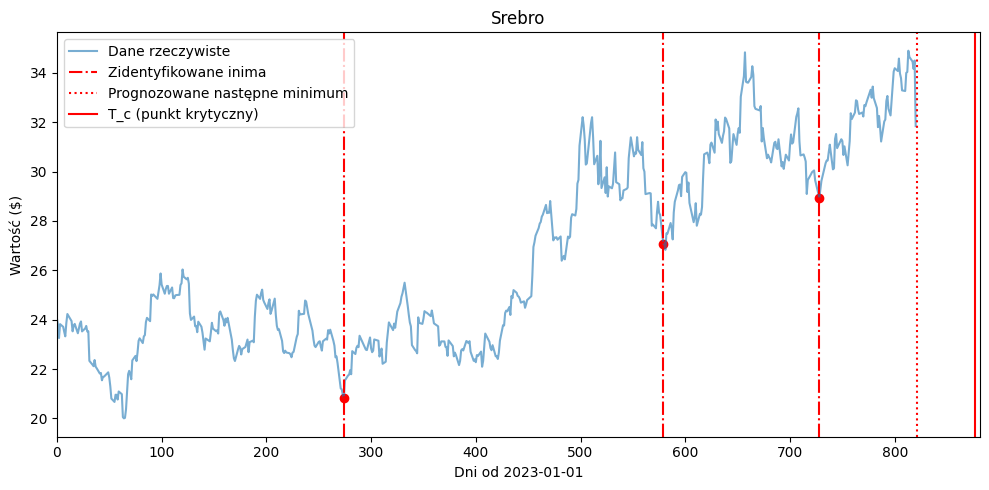

In [ ]:
fit_log_periodic(t, y, dates, [275, 580, 730], "Srebro", "2023-01-01")

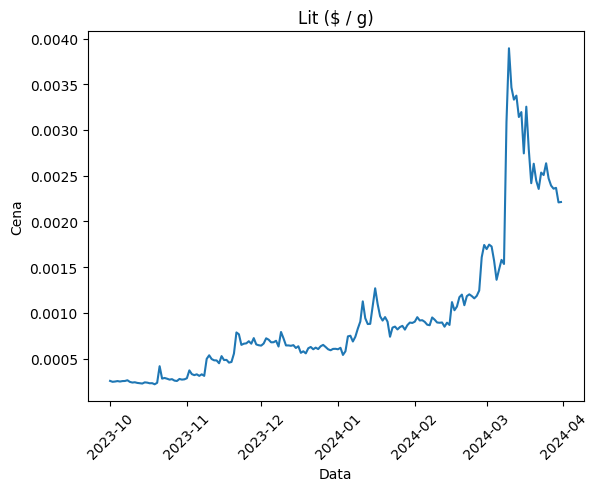

In [ ]:
sp = yf.Ticker("LITH-USD")

sp_hist = sp.history(start="2023-10-01", end="2024-04-01", interval="1d")

plt.plot(sp_hist['Close'])
plt.title("Lit ($ / g)")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.ylabel("Cena")
plt.show()

dates = pd.to_datetime(sp_hist.index)
t_numeric = (dates - dates[0]).days
prices = sp_hist['Close'].values

sp_hist = sp_hist.reset_index()
sp_hist["time"] = (sp_hist["Date"] - sp_hist["Date"].min()).dt.days

t = sp_hist["time"].values
y = sp_hist["Close"].values

Lambda = 1.952
Krach w dniu: 2024-03-25


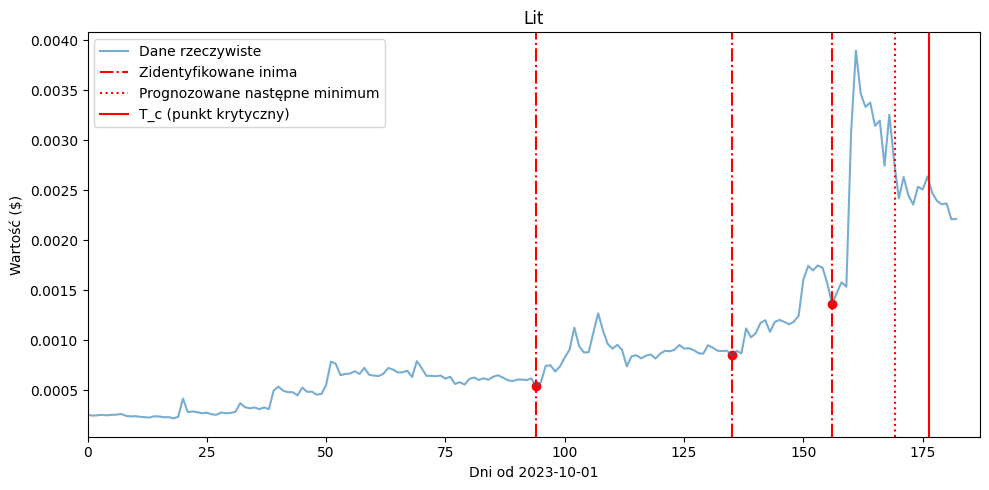

In [ ]:
fit_log_periodic(t, y, dates, [95, 135, 155], "Lit", "2023-10-01")